In [22]:
import pandas as pd  # for import file(csv,excel,etc)
import numpy as np # for numerical opt.
import seaborn as sns # adv. visulazation
import matplotlib.pyplot as plt  # basic visulaztion
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv("C:/Users/LJIN/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df['Gender'] = np.where(df['Gender'] == 'Male', 0,1)

In [27]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [28]:
df.corr(numeric_only=True,method='spearman')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,0.015249,0.999638,0.013149
Gender,-0.057400,1.000000,-0.034820,-0.057944,0.040222
Age,0.015249,-0.034820,1.000000,0.019767,-0.344940
Annual Income (k$),0.999638,-0.057944,0.019767,1.000000,0.007840
Spending Score (1-100),0.013149,0.040222,-0.344940,0.007840,1.000000


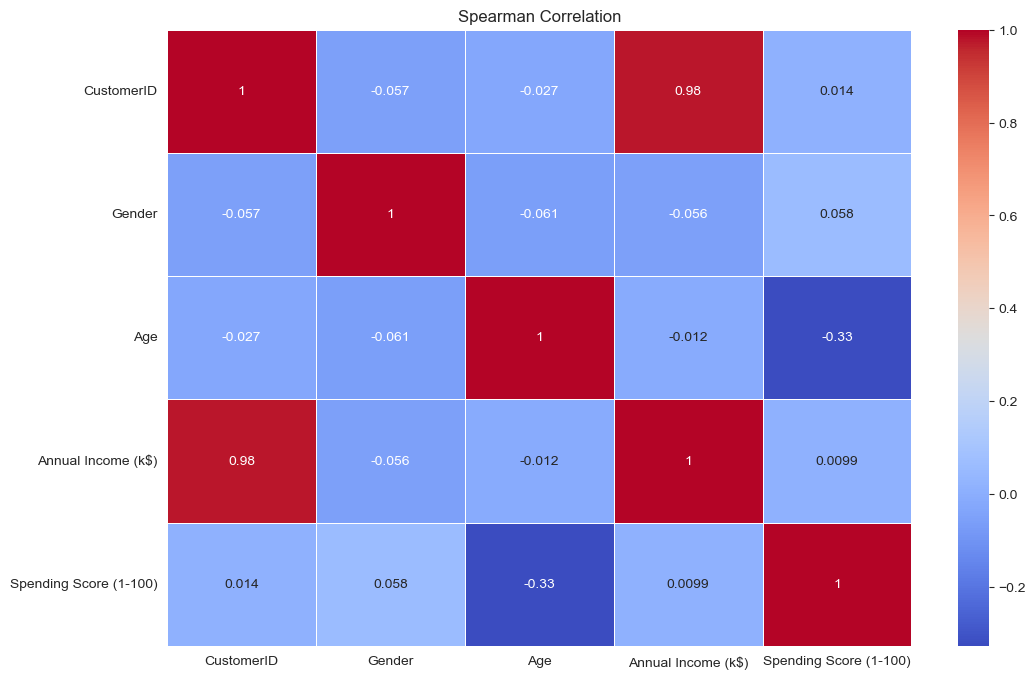

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman Correlation")
plt.show()


In [30]:
## Customer ID and annual income are highly correlated variables.

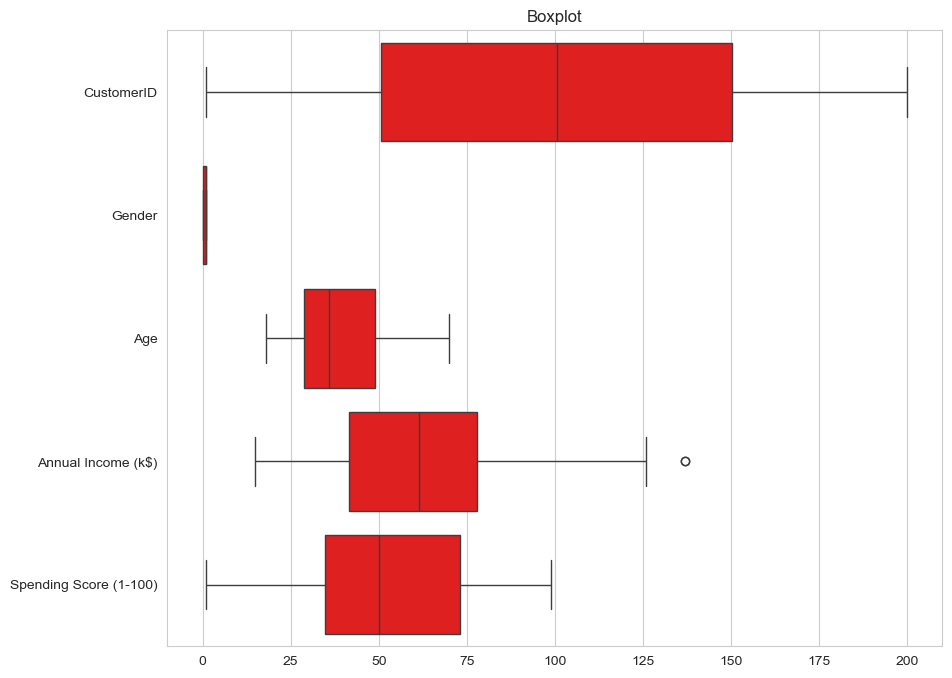

In [31]:
plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid')
sns.boxplot(data=df,orient="h",color="red")
plt.title("Boxplot")
plt.show()

In [32]:
## Dataset does not contains any outliers expect one observation from annual income.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [38]:
name=df.columns
name

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

## K-means clustering ##

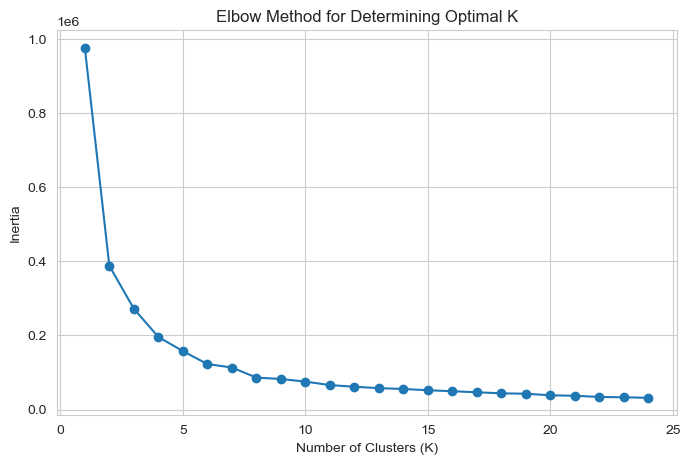

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
K_values = range(1,25)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal K")
plt.show()


Cluster Centroids (original scale):
    CustomerID    Gender        Age  Annual Income (k$)  \
0   63.380952  0.571429  46.166667           46.738095   
1  187.055556  0.500000  32.888889          105.666667   
2  105.738095  0.619048  39.952381           62.523810   
3  162.187500  0.437500  41.437500           85.343750   
4   20.000000  0.600000  43.900000           24.450000   
5  147.166667  0.583333  33.375000           76.458333   
6   23.090909  0.590909  25.272727           25.727273   

   Spending Score (1-100)   Cluster  
0               49.428571  2.000000  
1               71.555556  4.333333  
2               48.166667  2.952381  
3               16.406250  1.000000  
4               19.100000  0.000000  
5               83.333333  4.041667  
6               79.363636  6.000000  


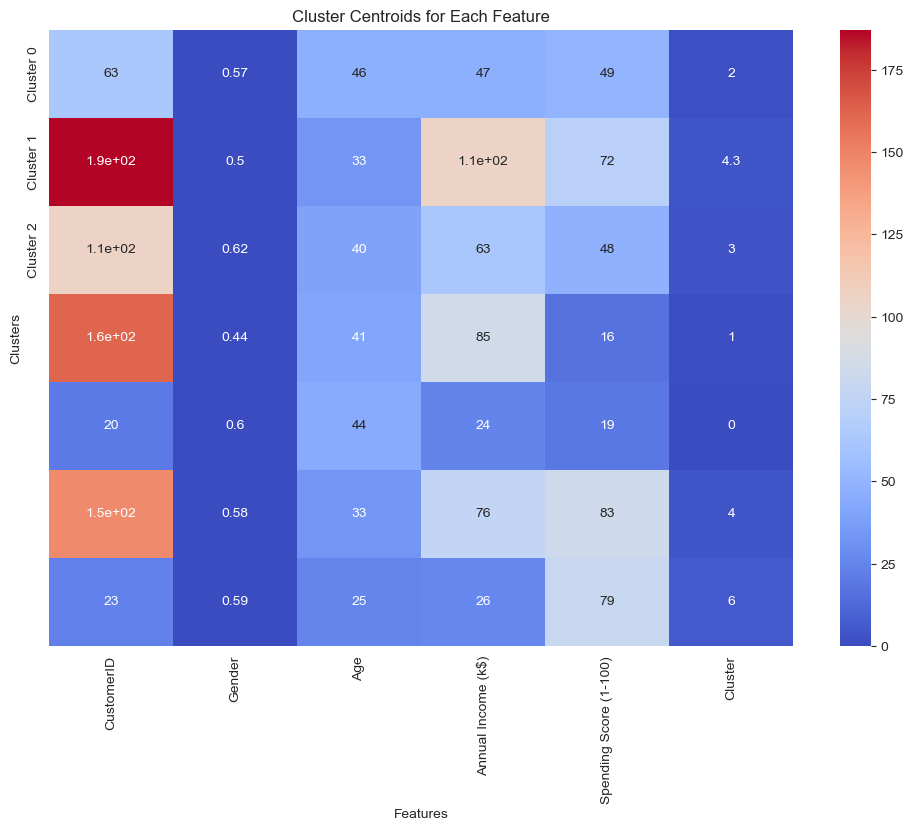

In [40]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=7)
df['Cluster'] = kmeans.fit_predict(df)

# View cluster centroids
centroids = kmeans.cluster_centers_


# Create a DataFrame for easy interpretation of centroids
centroids_df = pd.DataFrame(centroids,columns=name)
print("Cluster Centroids (original scale):\n", centroids_df)

# Plot cluster centroids for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap="coolwarm", xticklabels=name, yticklabels=[f'Cluster {i}' for i in range(3)])
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40284785354617897


## power transformation ##

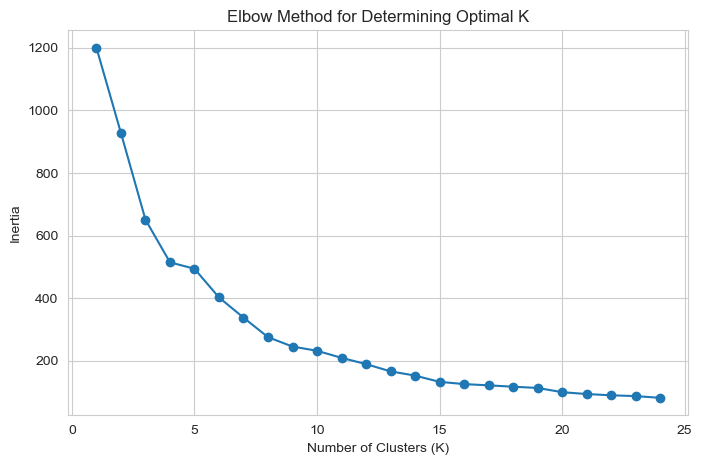

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans

# Standardize the data
scaler = PowerTransformer(method='yeo-johnson')  
data_scaled = scaler.fit_transform(df)

inertia_values = []
K_values = range(1,25)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal K")
plt.show()


Cluster Centroids (original scale):
    CustomerID    Gender        Age  Annual Income (k$)  \
0  110.348271  0.000000  43.279649           65.422029   
1  147.222530  0.610333  29.759458           80.447505   
2   94.321284  1.000000  45.223843           58.924628   
3   20.507706  0.599060  32.107397           24.789408   

   Spending Score (1-100)       Cluster  
0               33.878843  2.565480e+00  
1               68.035327  1.062299e+00  
2               41.273473  2.773749e+00  
3               48.719487  8.881784e-16  


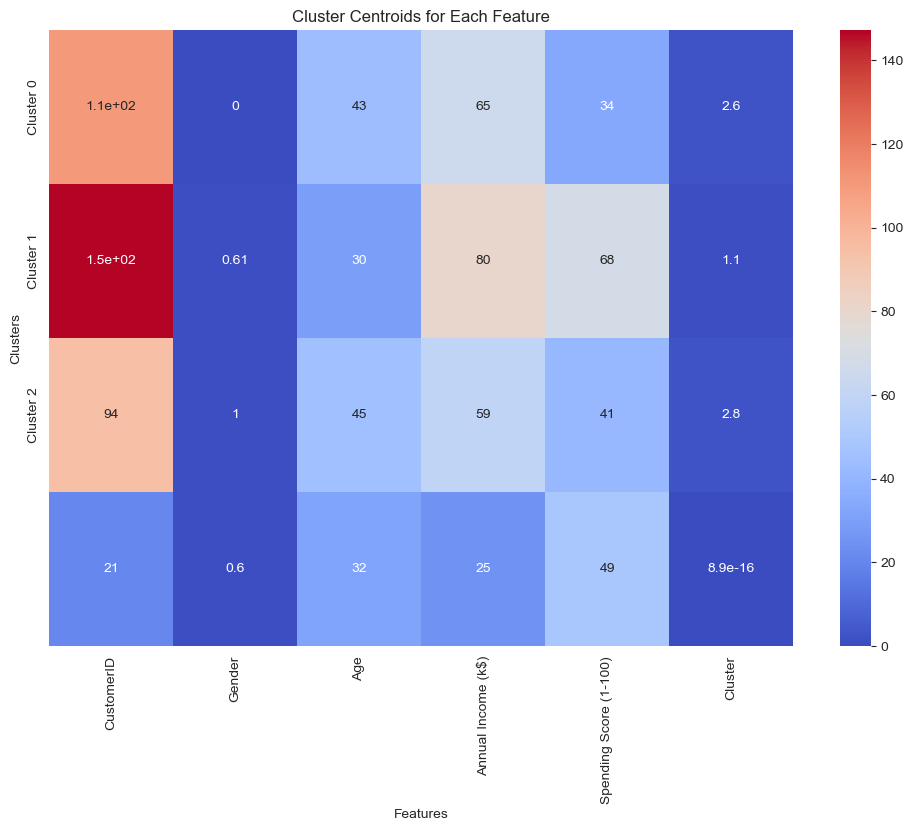

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer

# Standardize the data
scaler = PowerTransformer(method='yeo-johnson')  
data_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids back to original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame for easy interpretation of centroids
centroids_df = pd.DataFrame(centroids_original_scale,columns=name)
print("Cluster Centroids (original scale):\n", centroids_df)

# Plot cluster centroids for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap="coolwarm", xticklabels=name, yticklabels=[f'Cluster {i}' for i in range(3)])
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [49]:
from sklearn.metrics import silhouette_score

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1589683183595836


## Standard scalar ##

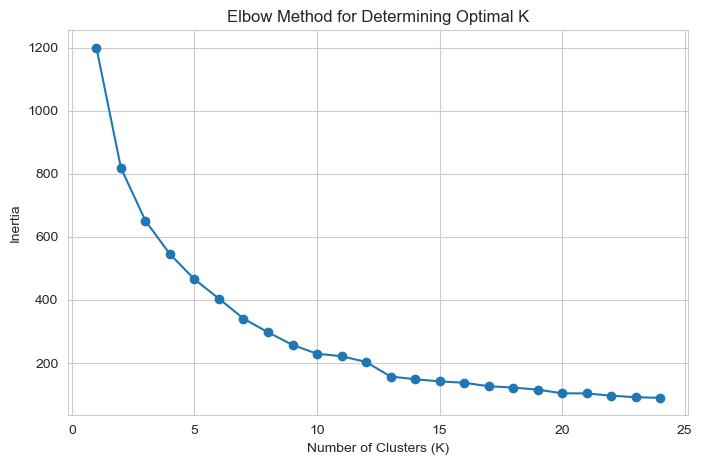

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(df)

inertia_values = []
K_values = range(1,25)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal K")
plt.show()

Cluster Centroids (original scale):
     CustomerID  Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
0   160.444444    0.00  33.277778           87.111111               82.666667   
1    79.461538    1.00  53.884615           52.692308               48.692308   
2    81.550000    0.00  58.750000           53.550000               48.550000   
3    16.800000    0.00  35.600000           22.000000               35.400000   
4    22.769231    1.00  25.461538           25.692308               80.538462   
5   159.500000    0.00  39.500000           85.150000               14.050000   
6    85.538462    0.00  25.153846           55.307692               53.000000   
7    92.400000    1.00  27.960000           57.360000               47.120000   
8    21.500000    0.75  45.937500           25.437500               16.625000   
9   163.333333    1.00  32.190476           86.047619               81.666667   
10  171.000000    1.00  44.600000           92.333333               21.6

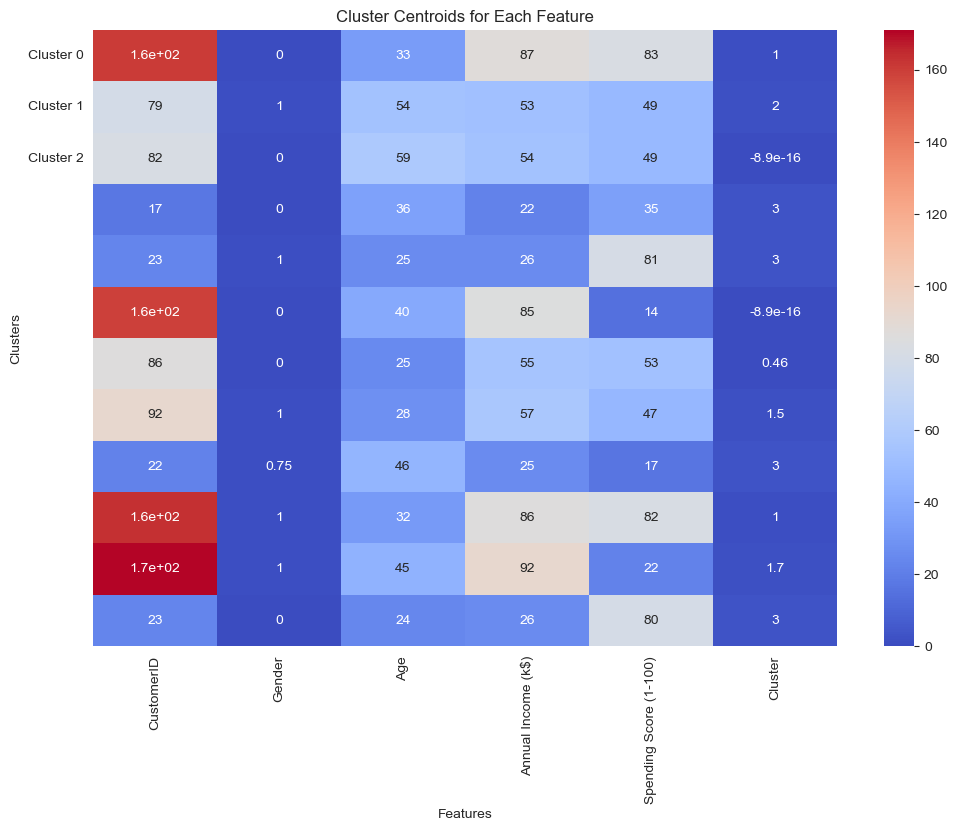

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=12)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids back to original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame for easy interpretation of centroids
centroids_df = pd.DataFrame(centroids_original_scale,columns=name)
print("Cluster Centroids (original scale):\n", centroids_df)

# Plot cluster centroids for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap="coolwarm", xticklabels=name, yticklabels=[f'Cluster {i}' for i in range(3)])
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.00407493770694845


## minmax scalar ##

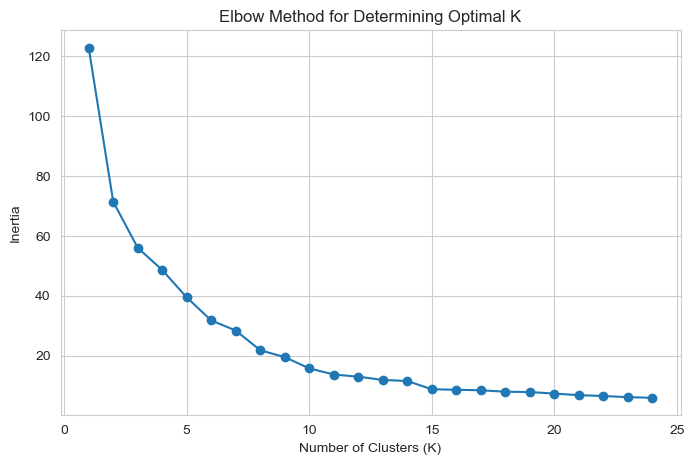

In [54]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)
inertia_values = []
K_values = range(1, 25)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal K")
plt.show()

Cluster Centroids (original scale):
    CustomerID        Gender        Age  Annual Income (k$)  \
0   79.461538  1.000000e+00  53.884615           52.692308   
1  157.825000  1.110223e-16  35.875000           85.050000   
2  163.333333  1.000000e+00  32.190476           86.047619   
3   24.285714  1.000000e+00  25.857143           26.642857   
4  136.424242  1.000000e+00  35.151515           76.454545   
5   59.583333  4.440892e-16  43.083333           43.208333   
6   32.722222  1.000000e+00  37.111111           31.277778   

   Spending Score (1-100)   Cluster  
0               48.692308  1.000000  
1               46.775000  2.800000  
2               81.666667  9.000000  
3               79.142857  4.214286  
4               35.090909  8.363636  
5               49.958333  5.020833  
6               29.111111  7.666667  


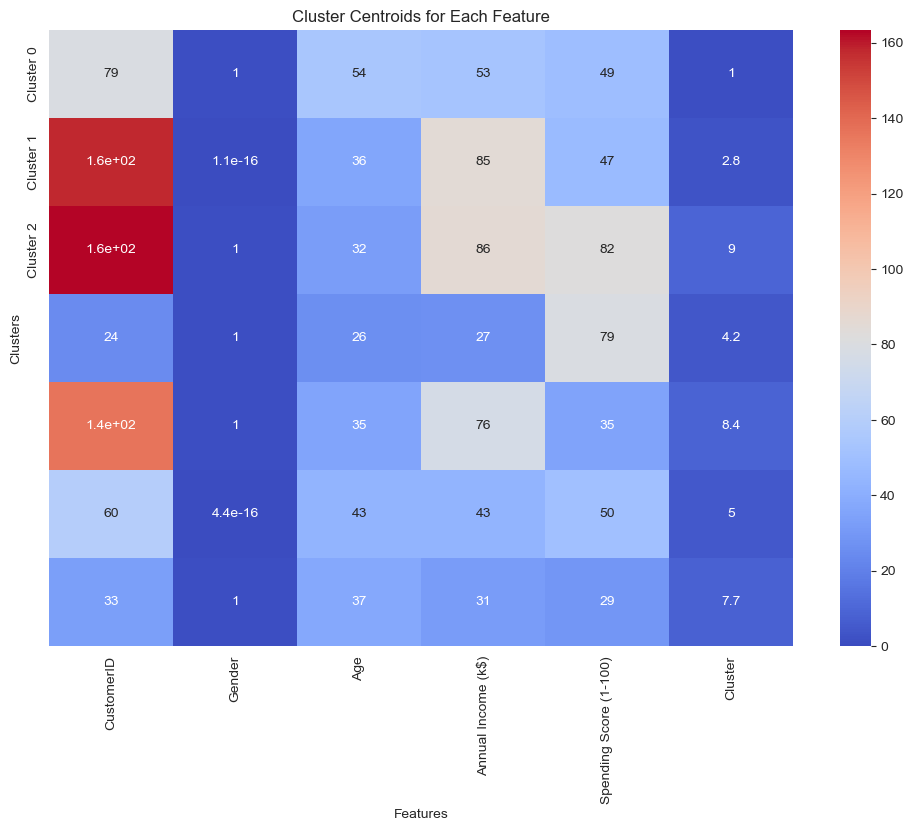

In [57]:
# Standardize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids back to original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame for easy interpretation of centroids
centroids_df = pd.DataFrame(centroids_original_scale,columns=name)
print("Cluster Centroids (original scale):\n", centroids_df)

# Plot cluster centroids for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap="coolwarm", xticklabels=name, yticklabels=[f'Cluster {i}' for i in range(3)])
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [58]:
from sklearn.metrics import silhouette_score

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.008772985231468182


## quantile transformation ##

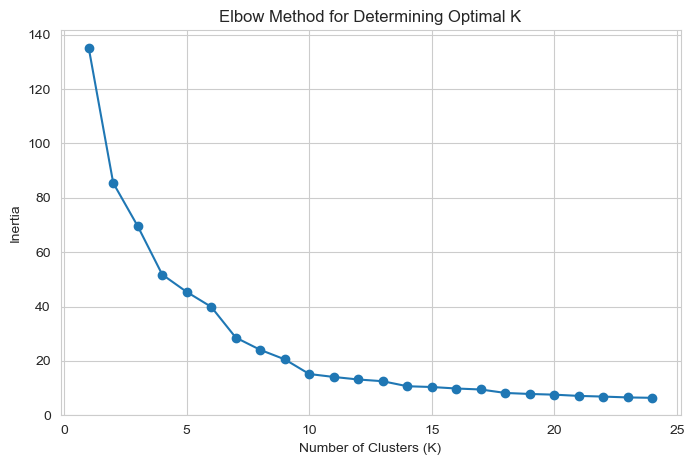

In [59]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans

# Standardize the data
scaler = QuantileTransformer(output_distribution='uniform')  # Use 'uniform' for a uniform distribution
data_scaled = scaler.fit_transform(df)

inertia_values = []
K_values = range(1, 25)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal K")
plt.show()


Cluster Centroids (original scale):
    CustomerID  Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
0  157.711111     1.0  34.622222           78.000000               52.000000   
1   66.551724     0.0  53.000000           48.000000               43.310345   
2   43.024390     1.0  31.000000           38.963415               50.000000   
3   79.461538     1.0  52.000000           54.000000               49.000000   
4  157.825000     0.0  35.000000           78.000000               48.000000   
5   48.947368     0.0  23.000000           40.000000               59.000000   

   Cluster  
0      3.0  
1      5.0  
2      5.0  
3      0.0  
4      1.0  
5      5.0  


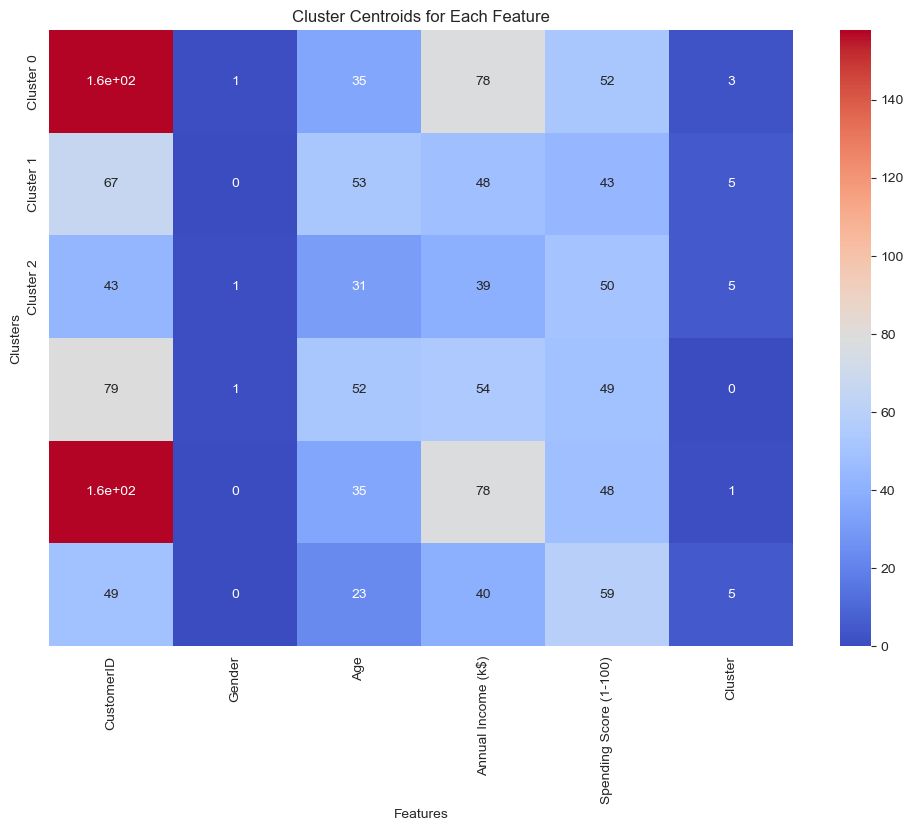

In [60]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans

# Standardize the data
scaler = QuantileTransformer(output_distribution='uniform')  # Use 'uniform' for a uniform distribution
data_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids back to original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame for easy interpretation of centroids
centroids_df = pd.DataFrame(centroids_original_scale,columns=name)
print("Cluster Centroids (original scale):\n", centroids_df)

# Plot cluster centroids for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap="coolwarm", xticklabels=name, yticklabels=[f'Cluster {i}' for i in range(3)])
plt.title("Cluster Centroids for Each Feature")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.03297198267170277


In [ ]:
##Interpretation- K-means clustering without any transformation gives 40% accuracy of model. By using any transformation reduced the accuracy of model.